<a href="https://colab.research.google.com/github/Valentinadjdj/DomRabota1/blob/main/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Урок 4. Визуальный анализ данных**

### **Условие 1: Задача 1**
Постройте график;
Назовите график;
Сделайте именование оси x и оси y;
Сделайте выводы;

1. Скачать следующие данные: kc-house-data и laptop_price
2. Изучите стоимости недвижимости
3. Изучите распределение квадратуры жилой
4. Изучите распределение года постройки

In [13]:
#1
import pandas as pd
df = pd.read_csv('kc_house_data.csv')
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]



*  id - Уникальный ID для каждого дома
*  date - Дата продажи дома
*  price - Стоимость продажи дома
*  bedrooms - Кол-во спален
*  bathrooms - Кол-во ванных комнат (0.5 - туалет без душа)
*  sqft_living - Кв. метры жилые
*  sqft_lot - Кв. метры общие
*  floors - Кол-во этажей
*  waterfront - Есть набержная или нет
*  view - Значение от 0 до 4 насколько хороший вид
*  condition - Значение от 1 до 5 насколько хорошее состояние
*  grade - Значение от 1 до 13, где 1-3 плохая конструкция здания и дизайн, 7 - средний уровень конструкции и дизайна, 11-13 - высокое качество конструкции и дизайна
*  sqft_above - Кв. метры дома, которые находятся выше земли
*  sqft_basement - Кв. метры дома, которые находятся ниже земли
*  yr_built - Год постройки дома
*  yr_renovated - Год ремонта дома
*  zipcode - Индекс
*  lat - Широтма
*  long - Долгота
*  sqft_living15 - Кв. метры жилой площади у 15 соседей
*  sqft_lot15 - Кв. метры общей площади у 15 соседей




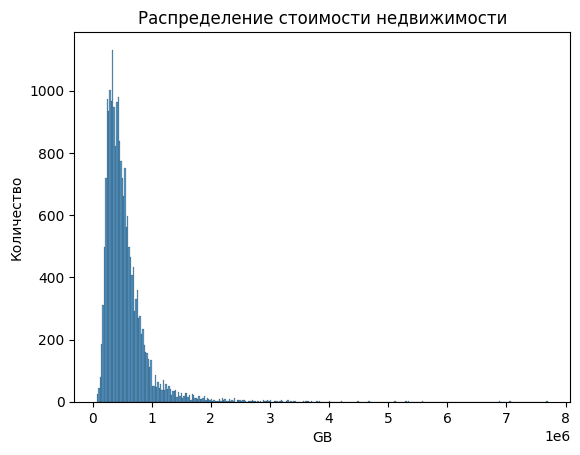

In [18]:
#2
import matplotlib. pyplot as plt
import seaborn as sns
sns.histplot(df['price'])
plt.title("Распределение стоимости недвижимости")
plt.xlabel("GB")
plt.ylabel("Количество");

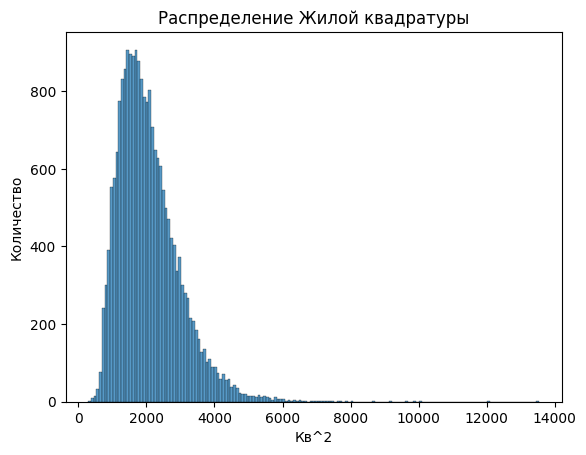

In [17]:
#3
sns.histplot(df['sqft_living'])
plt.title("Распределение Жилой квадратуры")
plt.xlabel("Кв^2")
plt.ylabel("Количество");

In [20]:
#4
years_list = [1900+i*10 for i in range (0,13)]

In [22]:
data_yr = df['yr_built'].value_counts(ascending=True)
data_yr.head()


1934    21
1935    24
1902    27
1901    29
1933    30
Name: yr_built, dtype: int64

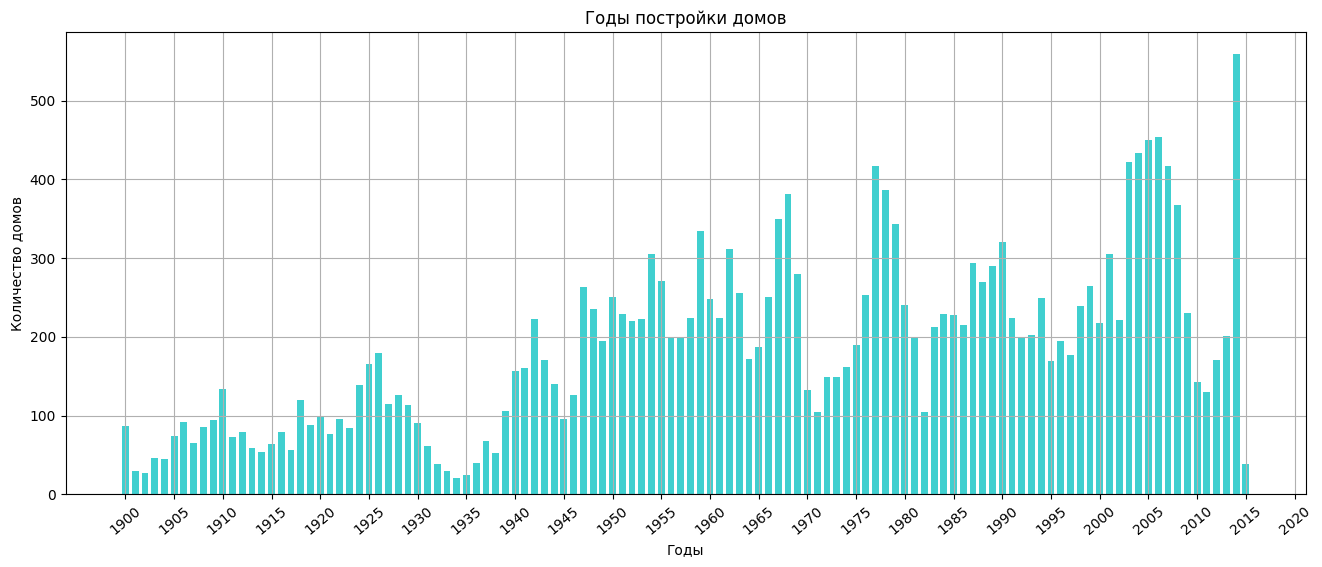

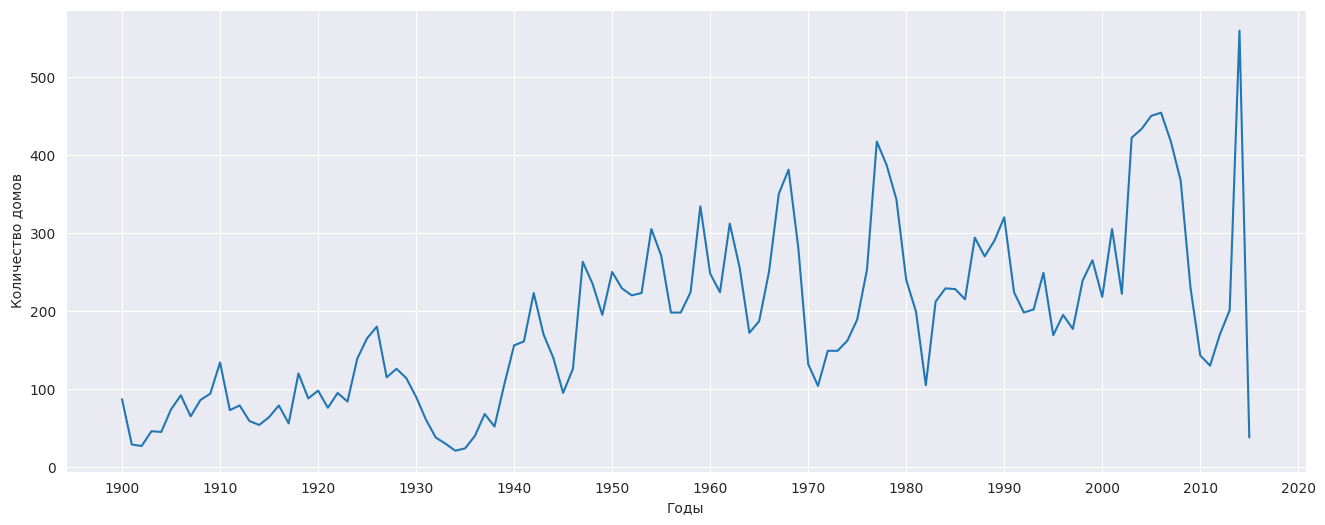

In [23]:
names = data_yr.index
values = data_yr.values
yr_list = list(range(1900,2025,5))
plt.figure(figsize=(16, 6))
plt.bar(names,values, width=0.7, facecolor='c', alpha=0.75)
plt.title('Годы постройки домов')
plt.xlabel('Годы')
plt.ylabel('Количество домов')
plt.grid(True)
plt.xticks(yr_list,rotation=40);
plt.show()

plt.figure(figsize=(16,6))
sns.set_style("darkgrid")
sns.lineplot(data=data_yr, x=names,y=values)
plt.xlabel('Годы')
plt.ylabel('Количество домов')
plt.xticks(ticks=years_list);

Кризисы строительтва были в середине 30-хб начале 70-х, пики в конце 60-хб 70-х и середине нулевых

### **Условие 2: 2 задача**
1. Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы
2. Изучите распределение этажей домов
3. Изучите распределение состояния домов

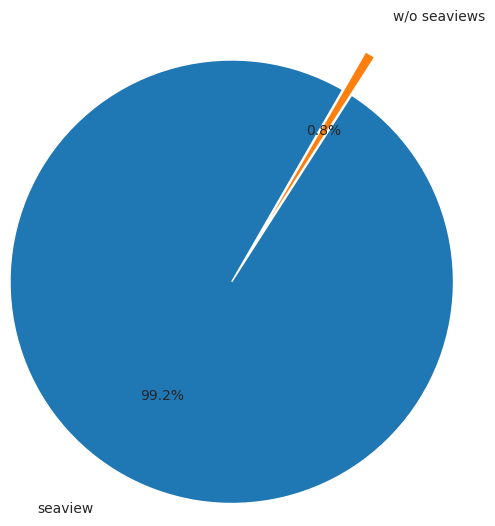

In [26]:
#1
data_view = df['waterfront'].value_counts()
val = data_view.values
plt.pie(val,labels=['seaview', 'w/o seaviews'],explode=[0,0.3],
        radius = 1.5, startangle=60,
        labeldistance=1.2, autopct='%.1f%%');

Всего  0,8% всей недвижимости продается с видом на набережную

In [27]:
#2
df.floors.max(), df.floors.min()

(3.5, 1.0)

In [28]:
data_floors = df['floors'].value_counts(normalize=True)*100
data_floors

1.0    49.414704
2.0    38.129829
1.5     8.837274
3.0     2.836256
2.5     0.744922
3.5     0.037015
Name: floors, dtype: float64

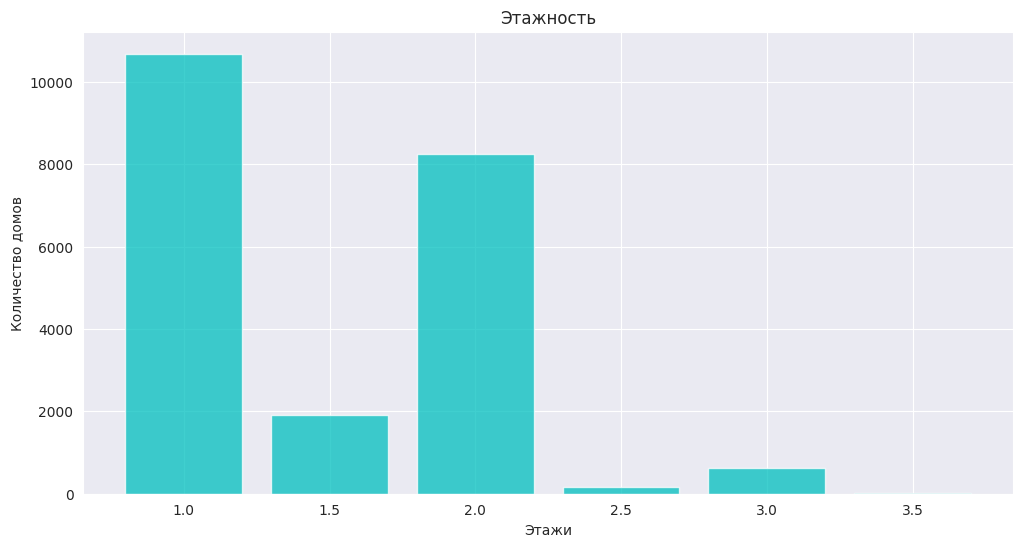

In [29]:
data_floor = df['floors'].value_counts()
f_val = data_floor.values
f_ind = data_floor.index
plt.figure(figsize=(12, 6))
plt.bar(f_ind,f_val, width=0.4, facecolor='c', alpha=0.75)
plt.title('Этажность')
plt.xlabel('Этажи')
plt.ylabel('Количество домов')
plt.grid(True)
plt.show()

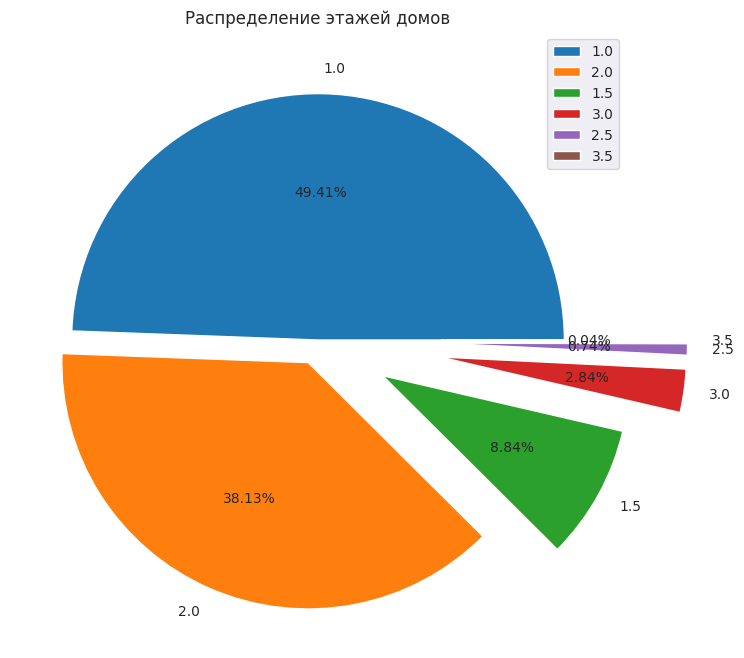

In [31]:
plt.figure(figsize=(10,8))
explode = [0.0, 0.1, 0.3, 0.5, 0.5, 0.5]
plt.pie(data_floors.values, autopct='%1.2f%%', labels=data_floors.index, explode=explode)
plt.legend(data_floors.index)
plt.title('Распределение этажей домов');

1. Большая часть домов состоит из 1 и 2 этажей.
2. Одноэтажные дома лидируют по продаже недвижимости в 49,4%.
3. Минимальная доля продажи приходится на 2,5-этажные и 3,5-этажные дома (0,74%, 0,04%)

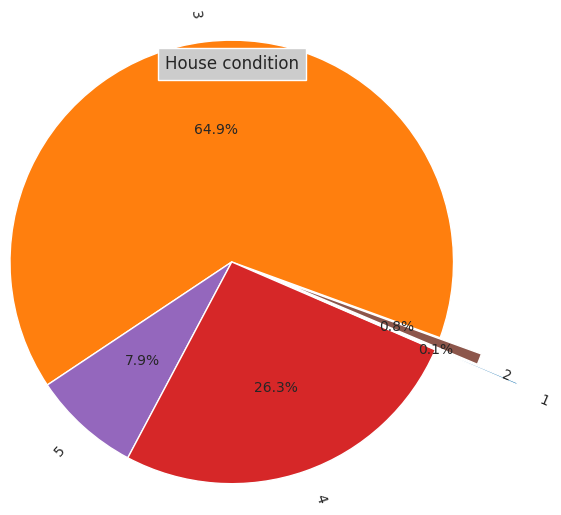

In [32]:
#3
data_cond = df['condition'].value_counts(sort=False)
data_cond
cond_val= data_cond.values
cond_ind = data_cond.index
cond_explode = [0,0,0,0.6,0.3]
colors = ["#ff7f0e", "#9467bd", "#d62728","#1f77b4", "#8c564b"]
plt.title("House condition")
plt.pie(cond_val, labels=cond_ind, radius = 1.5,
        startangle=-20, colors=colors,
        rotatelabels=True, explode = cond_explode,
        labeldistance=1.1, autopct='%.1f%%')
plt.title("House condition", bbox={'facecolor':'0.8', 'pad':5})
plt.show;

Менее 1% домов в плохом состоянии, около 2/3 домов в среднем (3) состоянии

### **Условие 3: 3 задача**
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [38]:
import numpy as np
corr_matrix = df.corr()


<ipython-input-38-081cddaa8eda>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [39]:
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

id  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id             1.0    0.0       0.0        0.0          0.0       0.0     0.0   
price          0.0    1.0       0.3        0.5          0.7       0.0     0.3   
bedrooms       0.0    0.3       1.0        0.5          0.6       0.0     0.0   
bathrooms      0.0    0.5       0.5        1.0          0.8       0.0     0.5   
sqft_living    0.0    0.7       0.6        0.8          1.0       0.0     0.4   
sqft_lot       0.0    0.0       0.0        0.0          0.0       1.0     0.0   
floors         0.0    0.3       0.0        0.5          0.4       0.0     1.0   
waterfront     0.0    0.3       0.0        0.0          0.0       0.0     0.0   
view           0.0    0.4       0.0        0.0          0.3       0.0     0.0   
condition      0.0    0.0       0.0        0.0          0.0       0.0    -0.3   
grade          0.0    0.7       0.4        0.7          0.8       0.0     0.5   
sqft_above     0.0    0.6       0.5        0.7          0.9       0.0     0.5   
sqft_basement  0.0    0.3       0.3        0.3          0.4       0.0     0.0   
yr_built       0.0    0.0       0.0        0.5          0.3       0.0     0.5   
yr_renovated   0.0    0.0       0.0        0.0          0.0       0.0     0.0   
zipcode        0.0    0.0       0.0        0.0          0.0       0.0     0.0   
lat            0.0    0.3       0.0        0.0          0.0       0.0     0.0   
long           0.0    0.0       0.0        0.0          0.0       0.0     0.0   
sqft_living15  0.0    0.6       0.4        0.6          0.8       0.0     0.3   
sqft_lot15     0.0    0.0       0.0        0.0          0.0       0.7     0.0   

               waterfront  view  condition  grade  sqft_above  sqft_basement  \
id                    0.0   0.0        0.0    0.0         0.0            0.0   
price                 0.3   0.4        0.0    0.7         0.6            0.3   
bedrooms              0.0   0.0        0.0    0.4         0.5            0.3   
bathrooms             0.0   0.0        0.0    0.7         0.7            0.3   
sqft_living           0.0   0.3        0.0    0.8         0.9            0.4   
sqft_lot              0.0   0.0        0.0    0.0         0.0            0.0   
floors                0.0   0.0       -0.3    0.5         0.5            0.0   
waterfront            1.0   0.4        0.0    0.0         0.0            0.0   
view                  0.4   1.0        0.0    0.3         0.0            0.3   
condition             0.0   0.0        1.0    0.0         0.0            0.0   
grade                 0.0   0.3        0.0    1.0         0.8            0.0   
sqft_above            0.0   0.0        0.0    0.8         1.0            0.0   
sqft_basement         0.0   0.3        0.0    0.0         0.0            1.0   
yr_built              0.0   0.0       -0.4    0.4         0.4            0.0   
yr_renovated          0.0   0.0        0.0    0.0         0.0            0.0   
zipcode               0.0   0.0        0.0    0.0        -0.3            0.0   
lat                   0.0   0.0        0.0    0.0         0.0            0.0   
long                  0.0   0.0        0.0    0.0         0.3            0.0   
sqft_living15         0.0   0.3        0.0    0.7         0.7            0.0   
sqft_lot15            0.0   0.0        0.0    0.0         0.0            0.0   

               yr_built  yr_renovated  zipcode  lat  long  sqft_living15  \
id                  0.0           0.0      0.0  0.0   0.0            0.0   
price               0.0           0.0      0.0  0.3   0.0            0.6   
bedrooms            0.0           0.0      0.0  0.0   0.0            0.4   
bathrooms           0.5           0.0      0.0  0.0   0.0            0.6   
sqft_living         0.3           0.0      0.0  0.0   0.0            0.8   
sqft_lot            0.0           0.0      0.0  0.0   0.0            0.0   
floors              0.5           0.0      0.0  0.0   0.0            0.3   
waterfront          0.0  

Определяем по какой из наибольшей карреляции (свыше 0,6) строить зависимость

<ipython-input-40-7e1487325bba>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  upp_mat = np.triu(df.corr())


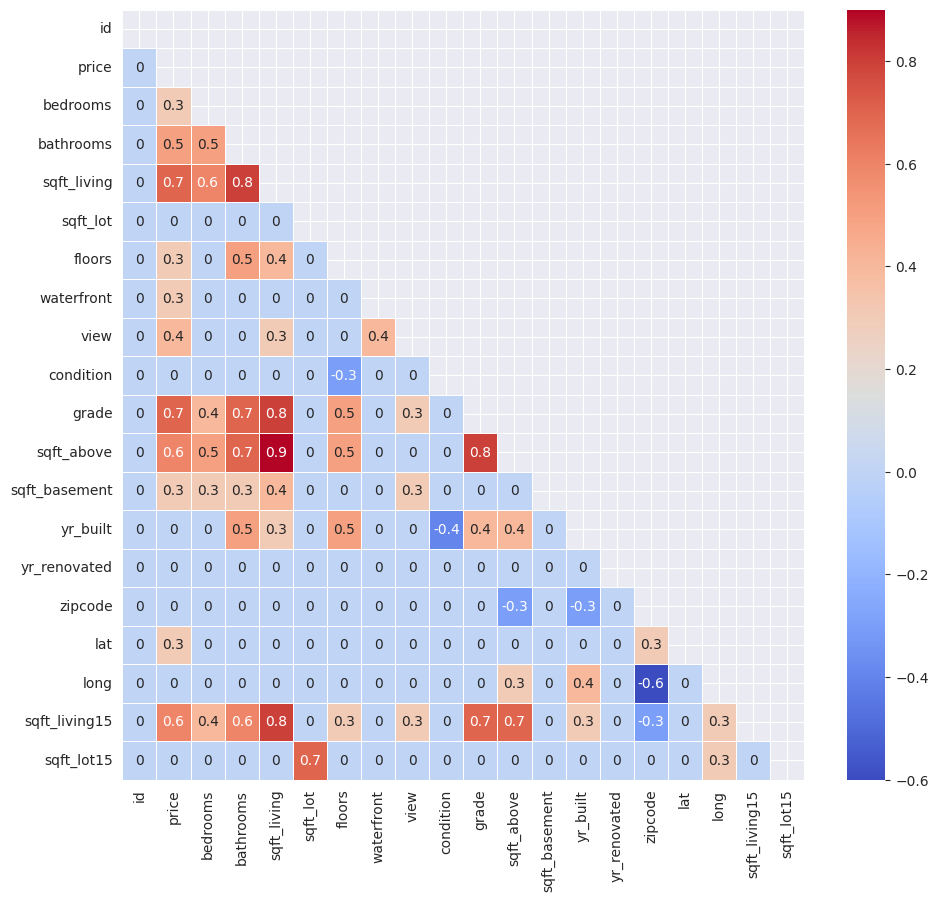

In [40]:
plt.figure(figsize=(11, 10))
upp_mat = np.triu(df.corr())
sns.heatmap(corr_matrix, annot=True, linewidths=.5,
            cmap='coolwarm', mask= upp_mat);

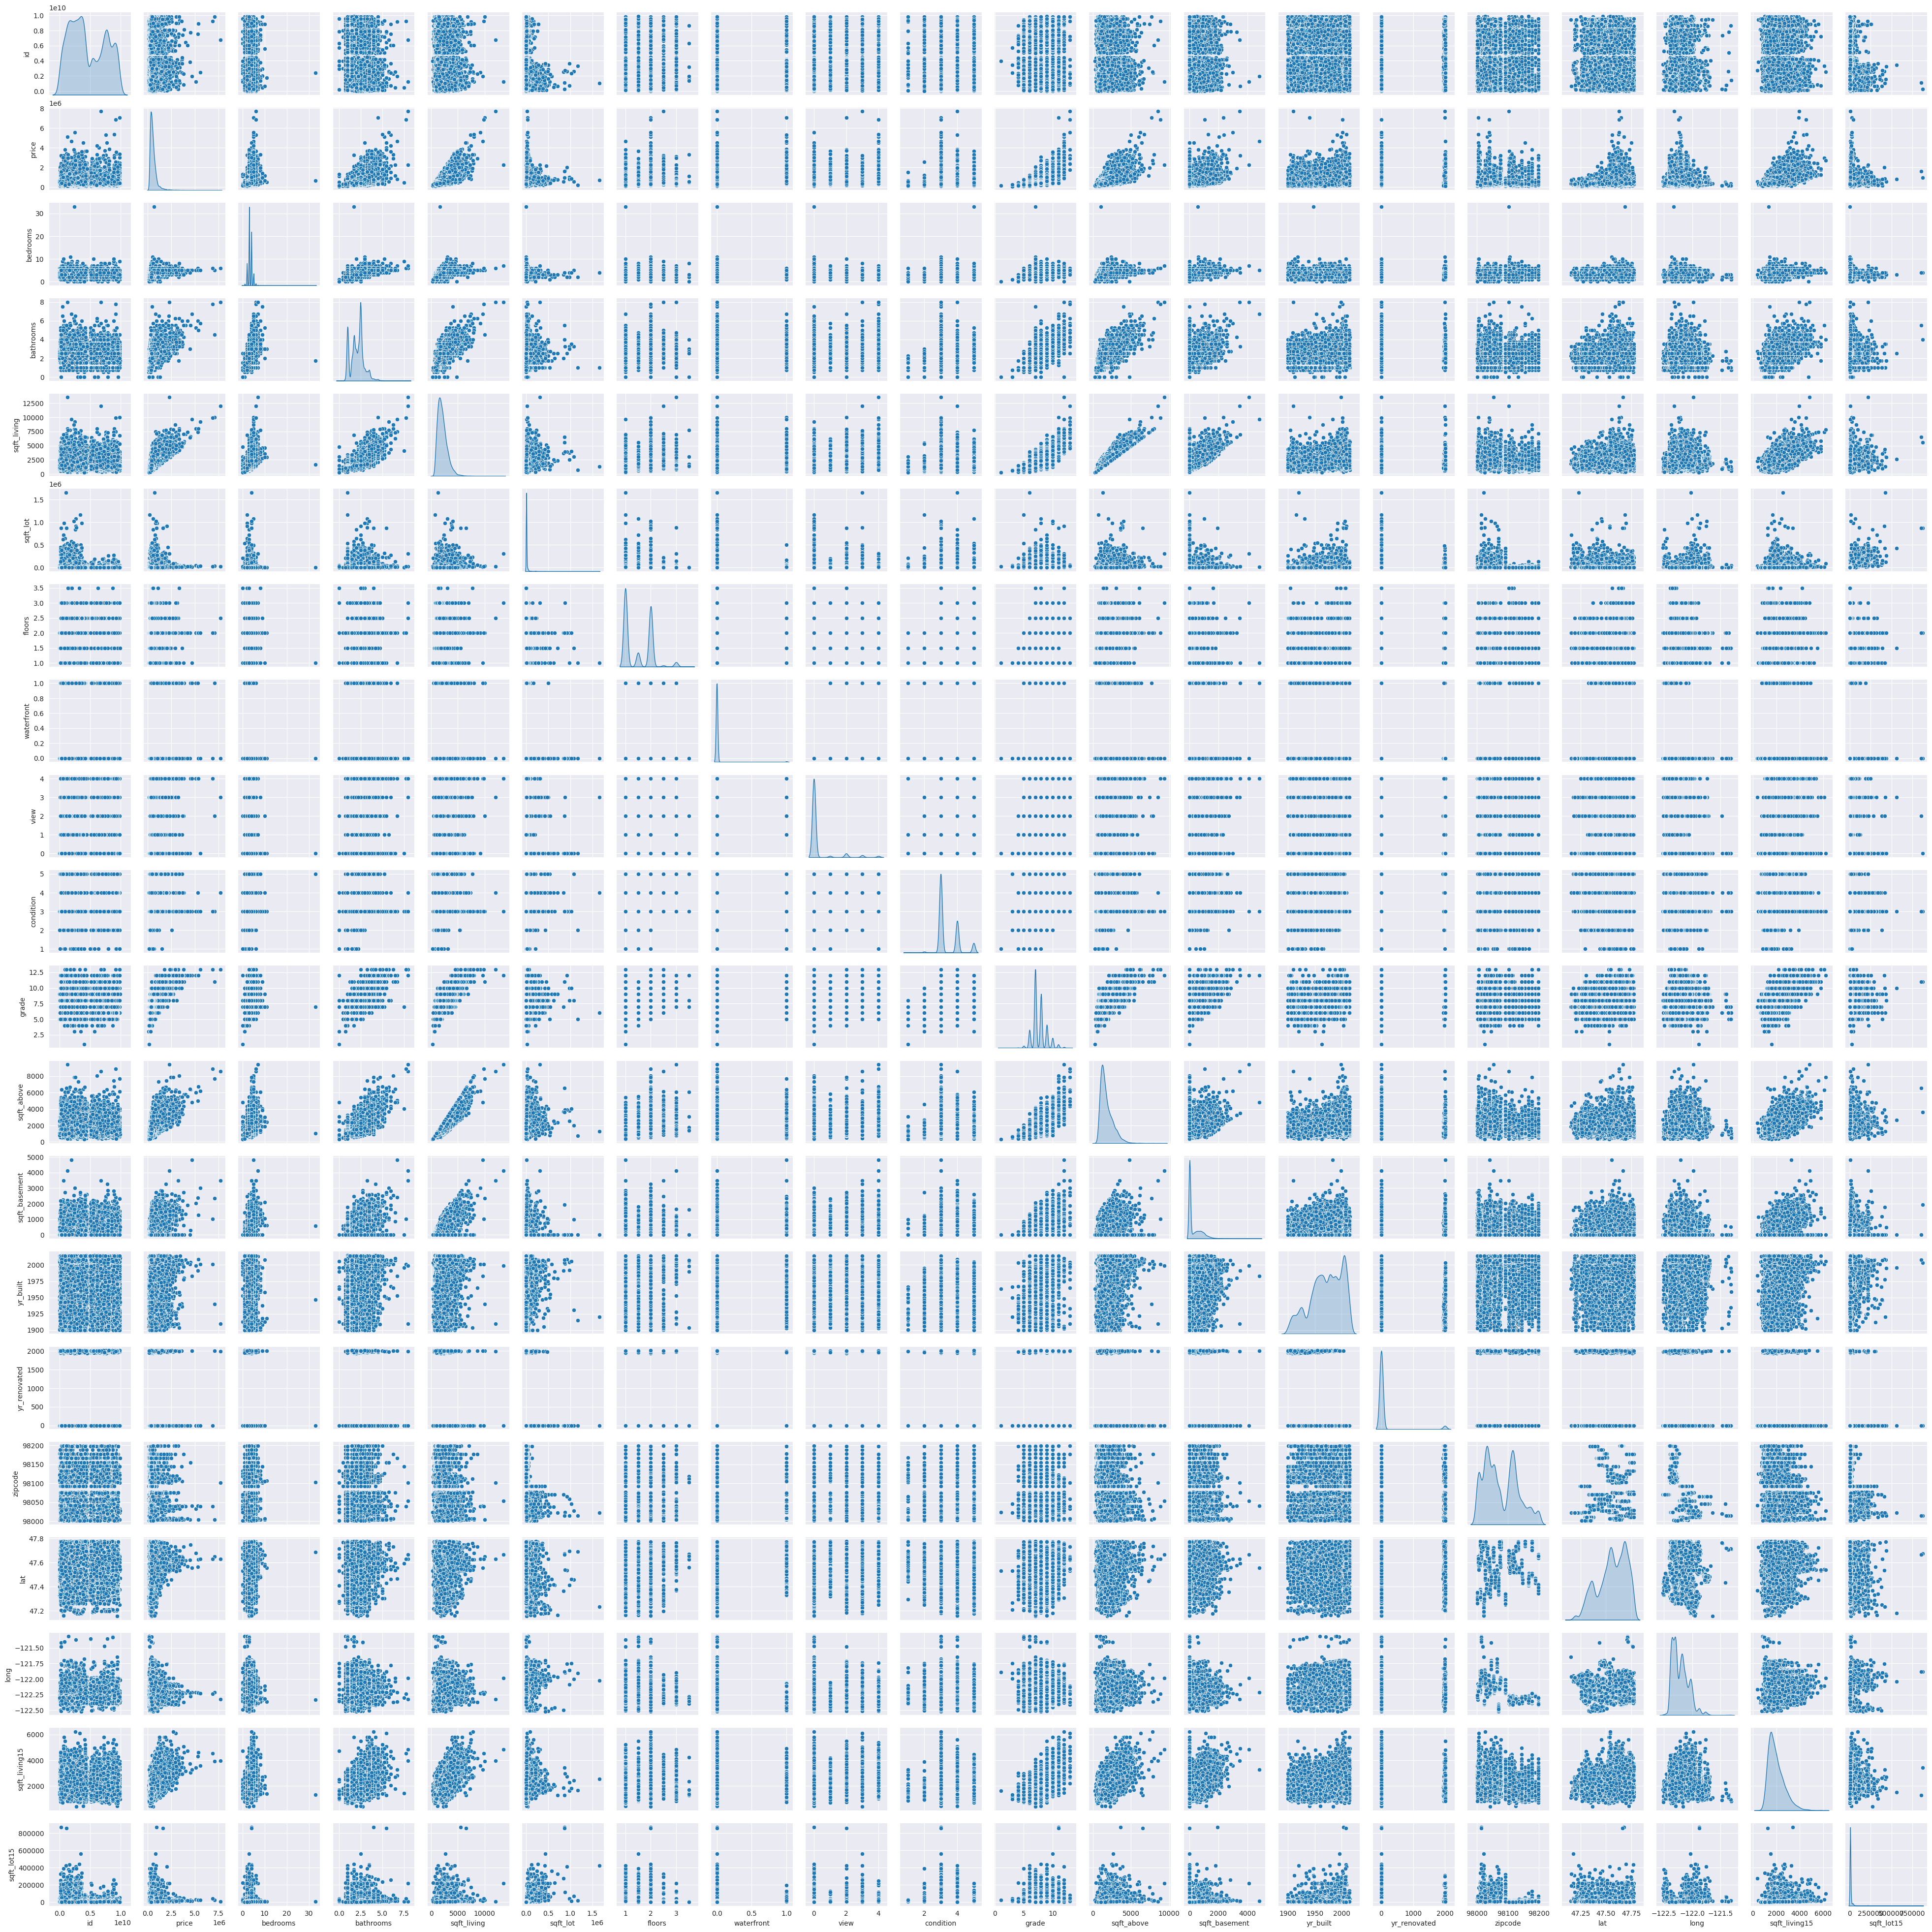

In [42]:
# kind` must be one of ['scatter', 'hist', 'hex', 'kde', 'reg', 'resid']
sns.pairplot(df, height=2, kind='scatter', diag_kind='kde')
plt.show()

В одном в формате storytelling провести анализ затруднительно, поэтому необходимо анализировать по частям

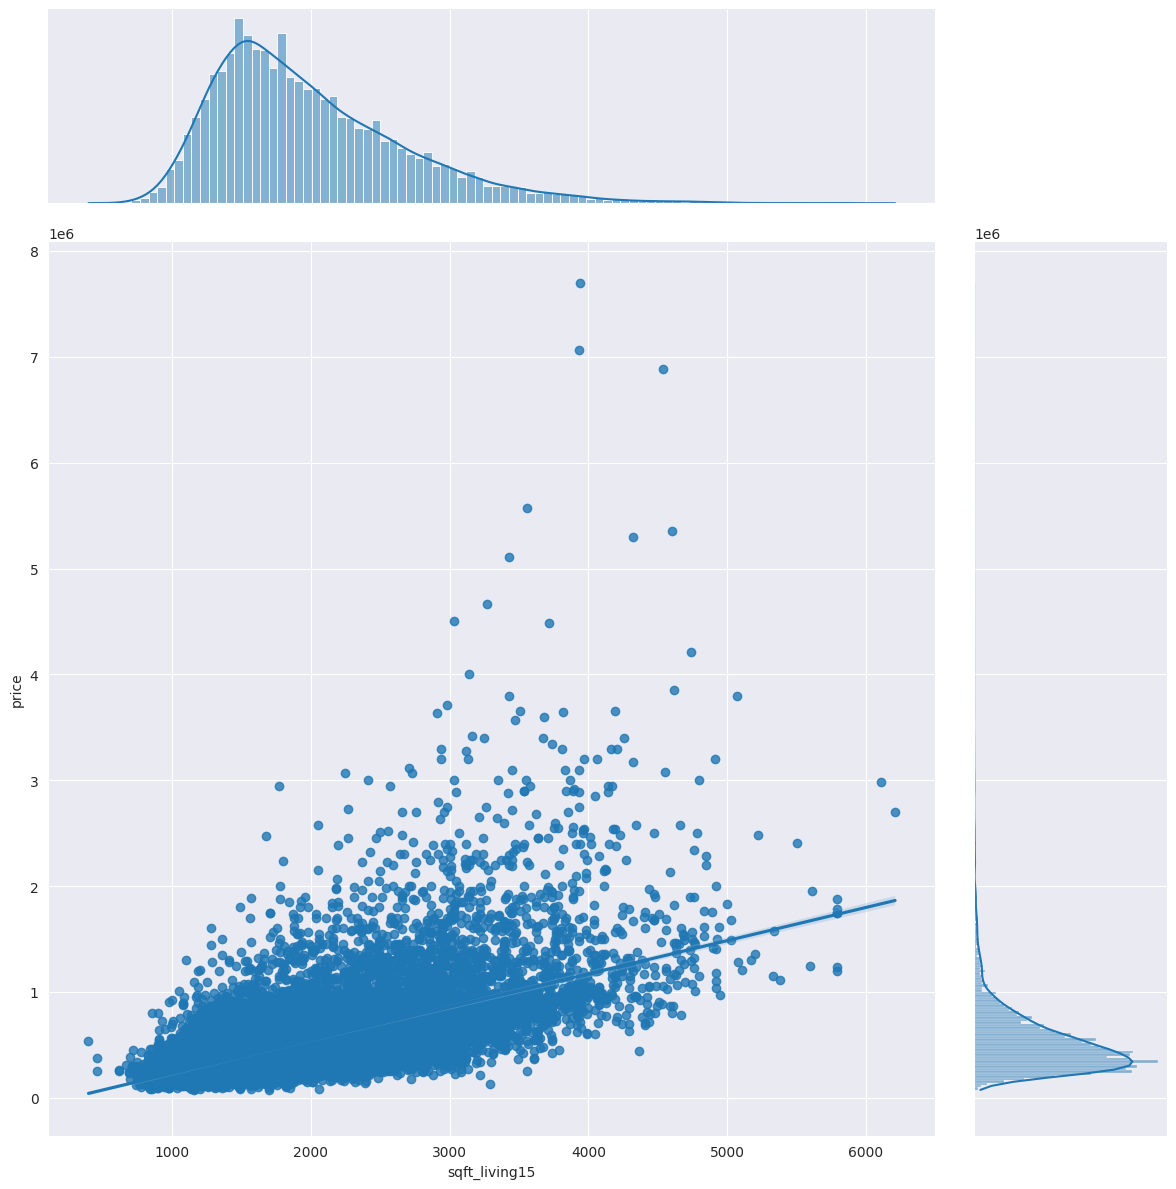

In [43]:
sns.jointplot(data=df, x="sqft_living15", y="price", kind="reg", height=12, ratio=4);

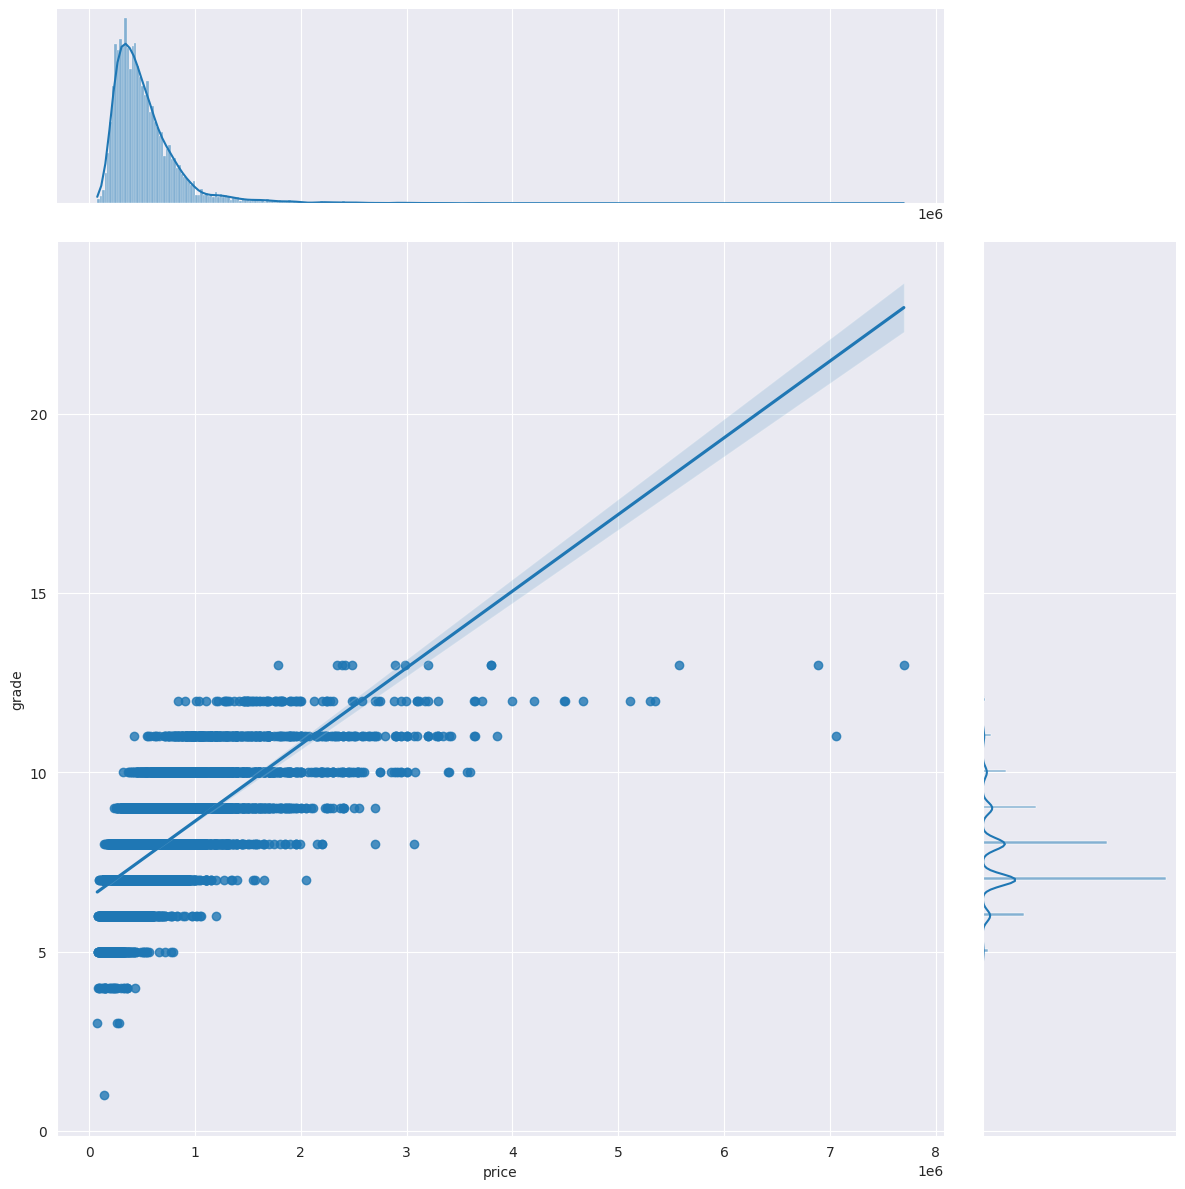

In [44]:
sns.jointplot(x = df['price'], y = df['grade'], kind = 'reg', height=12, ratio=4);

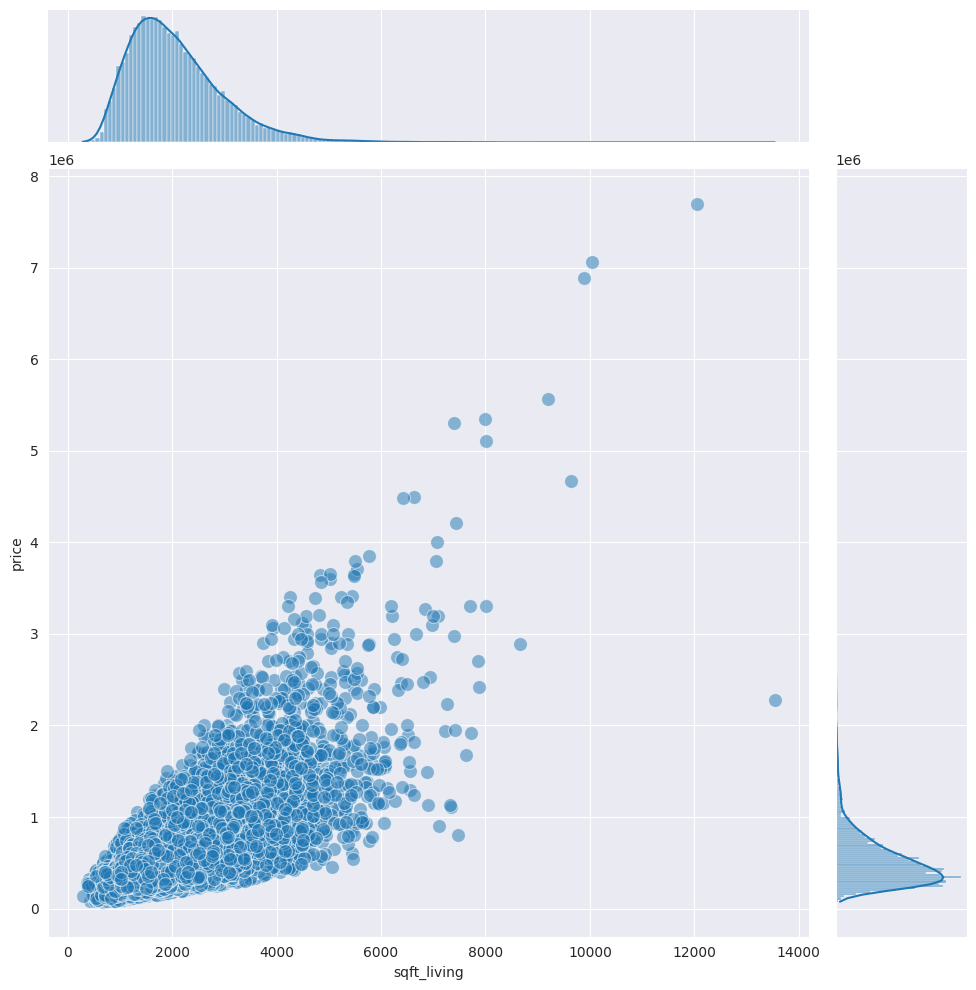

In [45]:
g = sns.JointGrid(data=df, x="sqft_living", y="price",height=10)
g.plot_joint(sns.scatterplot, s=100, alpha=.5)
g.plot_marginals(sns.histplot, kde=True);

In [46]:
data = df.groupby('yr_built')['price'].mean().reset_index()
data

yr_built          price
0        1900  581387.206897
1        1901  556935.931034
2        1902  673007.407407
3        1903  480958.195652
4        1904  583756.644444
..        ...            ...
111      2011  544522.000000
112      2012  527447.335294
113      2013  678545.452736
114      2014  683681.754919
115      2015  759785.157895

[116 rows x 2 columns]

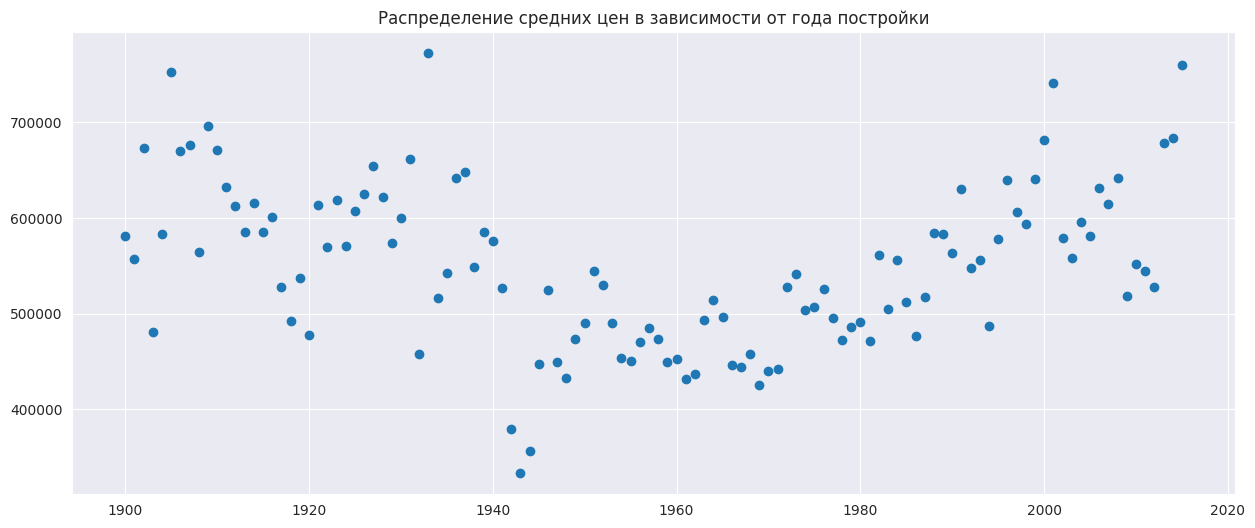

In [47]:
plt.figure(figsize=(15, 6))
plt.scatter(data['yr_built'], data['price'])
plt.title('Распределение средних цен в зависимости от года постройки');

- распределение цены в зависимости от года постройки имеет U-образную форму;
- цена на дома, построенные с 1900-х до 1960-х, постепенно опускалась;
- при этом цена на дома, построенные в1940-х годах, принимает неожиданно низкие значения;
- цена на дома, построенные с 1960-х годов, вновь начала расти;
- для домов, построенных в2020-х годах, цена почти такая же, как и для домов, построенных в 1900-х годах;
- могу предположить, что старые дома, которые стоят больше 1 века, имеют особую историческую значимость и поэтому их цена находится на одном уровне с ценами домов, построенных в 2000-х годах.

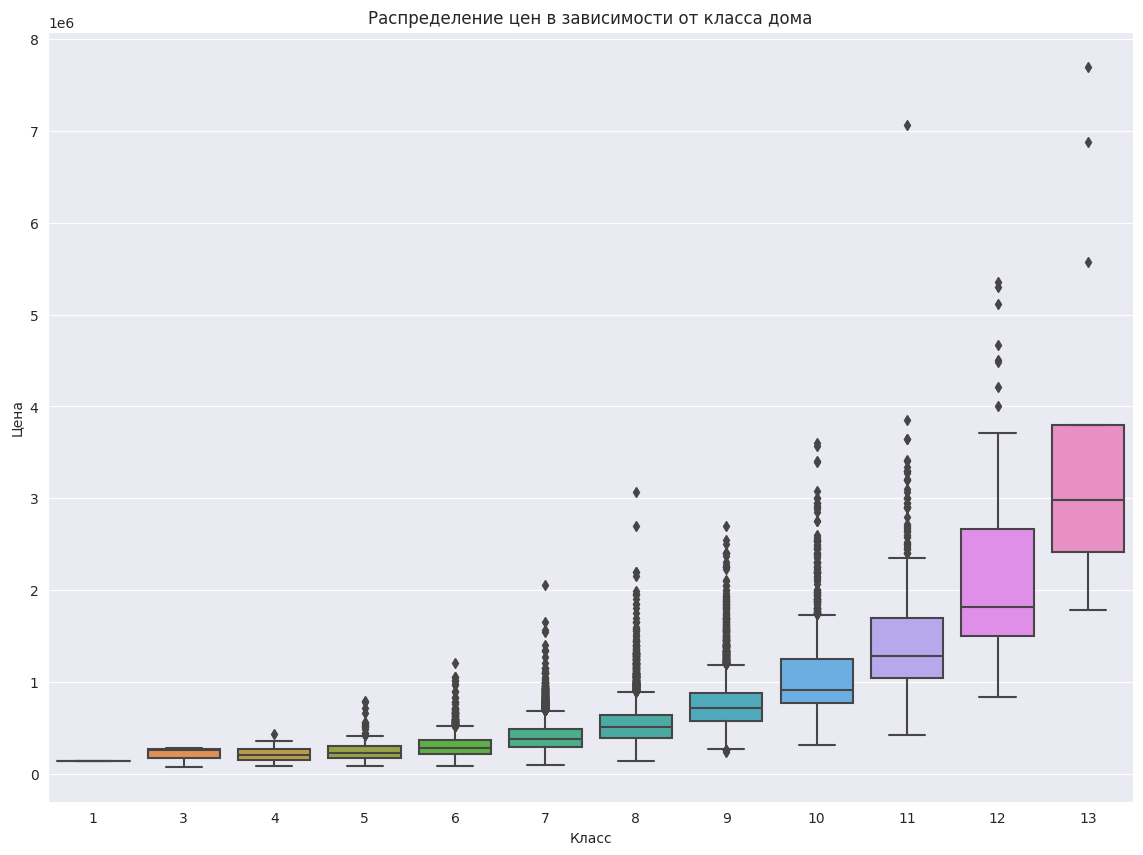

In [48]:
plt.figure(figsize=(14, 10))

sns.boxplot(x=df['grade'], y=df['price'], whis=1.0)

plt.xlabel('Класс')
plt.ylabel('Цена')
plt.title('Распределение цен в зависимости от класса дома');

- с увеличением уровня класса (grade - качество конструкции и дизайна дома) растет разбег по цене;
- для домов с 7-11 классом наблюдается максимальное количество выбросов.


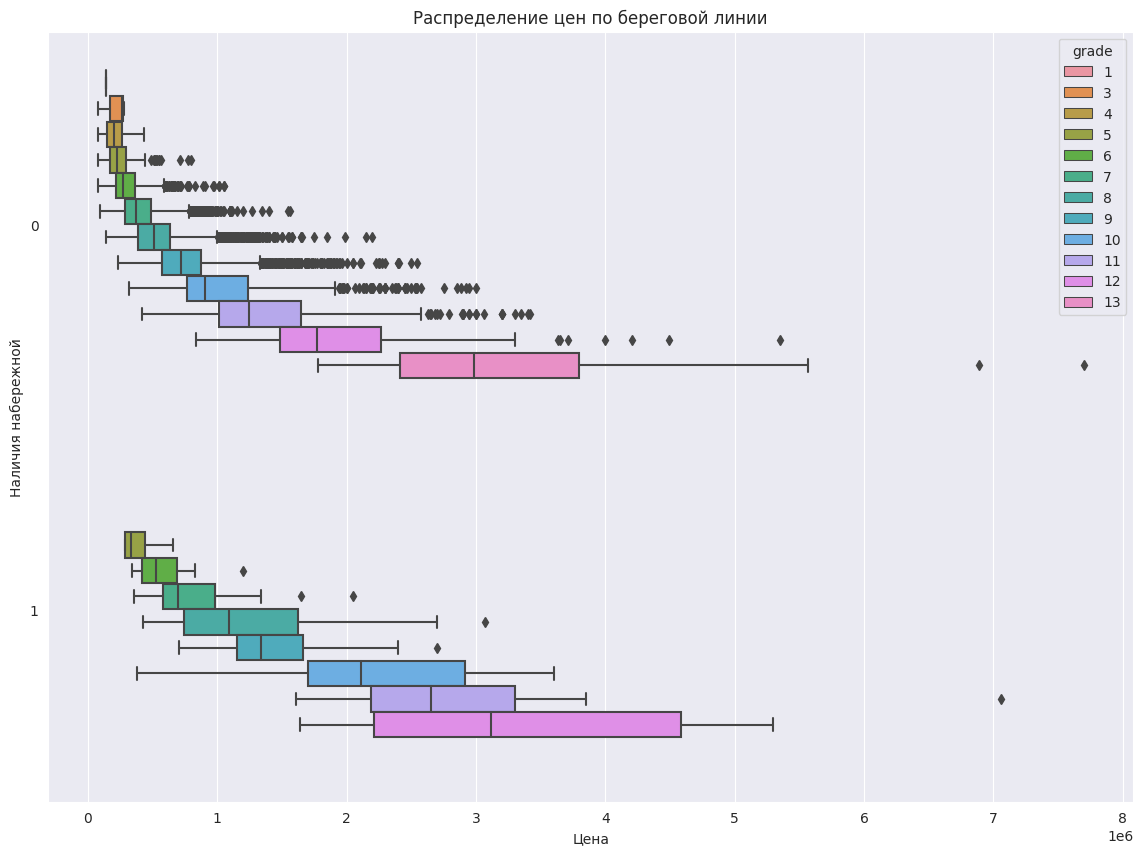

In [49]:
plt.figure(figsize=(14, 10))
sns.boxplot(x=df['price'], y=df['waterfront'].astype('str'), whis=1.5, hue=df['grade'])

plt.title('Распределение цен по береговой линии')
plt.xlabel('Цена')
plt.ylabel('Наличия набережной');

- уровень цен 50% домов, не имеющих набережную, значительно ниже, чем цена 50% домов, имеющих ее;
- для домов без набережной выбросов намного больше (видимо заинтересованность риелторов низкая по получаемой выручке и поэтому качество обработки данных теряеться);
- разбег цены для домов с набережной больше, чем для домов без нее.

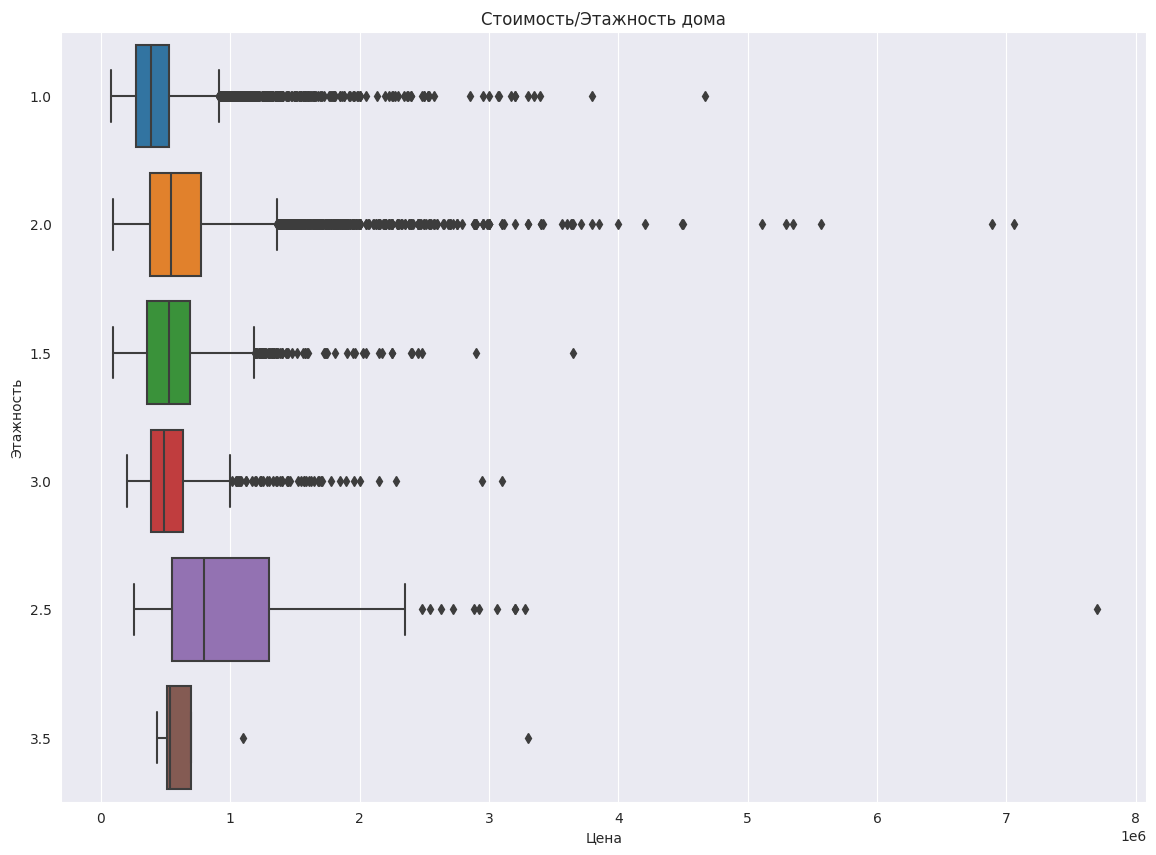

In [51]:
plt.figure(figsize = (14,10))
sns.boxplot(x = df['price'], y = df['floors'].astype('str'), whis = 1.5)
plt.xlabel('Цена')
plt.ylabel('Этажность')
plt.title('Стоимость/Этажность дома');

- наибольший разбег по ценам наблюдается для домов в 2,5 этажей;
- минимальный разбег по ценам наблюдается для домов в 3,5 этажей;
- по 2-этажным домам наблюдается максимальное количество выбросов;
- дома с 3,5 этажами почти не имеют выбросов;
- самый дорогой дом имеет 2,5 этажа и продается почти за 8 000 000 д.е.

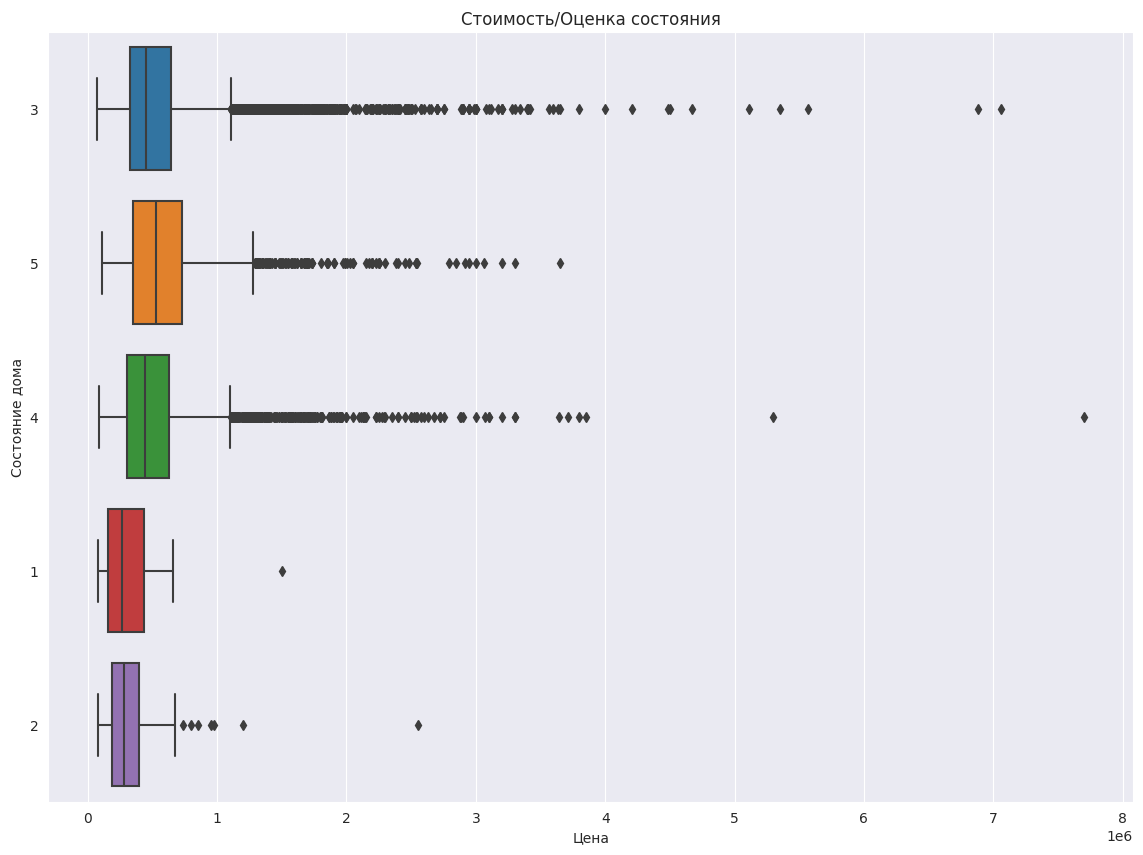

In [52]:
plt.figure(figsize = (14,10))
sns.boxplot(x = df['price'], y = df['condition'].astype('str'), whis = 1.5)
plt.xlabel('Цена')
plt.ylabel('Состояние дома')
plt.title('Стоимость/Оценка состояния');

- дома, состояние которых оценивается в 1 и 2 почти не имеют выбросов;
- по домам с состоянием в 3-4 наблюдаются максимальное количество выбросов;
- для домов с состоянием в 3-5 более 75% наблюдений находится почти на одном и том же уровне цены;
- самый дорогой дом имеет 2,5 этажа с хорошим состоянием и продается почти за 8 000 000 д.е.

Общий вывод:

На цену недвижимости влияют больше всего следующие параметры (в порядку убывания значимости):
жилая площадь;
качество конструкции и дизайна дома (класс);
историческую ценность;
размеры 15 соседних домов (Кв. метры жилой площади у 15 соседей).
Хороше обслуживают клиентов по приобритению жилого фонда на набережной, т.к. риэлторы получают больше выручки от продаж.
Реже продоют дома с 3,5 этажами.